In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("final_dataset.csv")
data.head()

,sentence,emotion,tokens,lemmatizer
0,not feel humiliated,stressed,"['not', 'feel', 'humiliated']","['not', 'feel', 'humiliated']"
1,go feeling hopeless damned hopeful around some...,stressed,"['go', 'feeling', 'hopeless', 'damned', 'hopef...","['go', 'feeling', 'hopeless', 'damned', 'hopef..."
2,grafting minute post feel greedy wrong,stressed,"['grafting', 'minute', 'post', 'feel', 'greedy...","['grafting', 'minute', 'post', 'feel', 'greedy..."
3,ever feeling nostalgic fireplace know still no...,unstressed,"['ever', 'feeling', 'nostalgic', 'fireplace', ...","['ever', 'feeling', 'nostalgic', 'fireplace', ..."
4,feeling crouch,stressed,"['feeling', 'crouch']","['feeling', 'crouch']"


In [3]:
data.shape

(34778, 4)

In [4]:
y = data.emotion

In [5]:
y.value_counts()

stressed      21413
unstressed    13365
Name: emotion, dtype: int64

<AxesSubplot:xlabel='emotion', ylabel='count'>

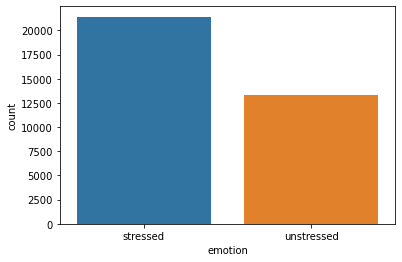

In [6]:
sns.countplot(data=data, x='emotion')

# Feature Engineering

Feature Engineering is a very key part of Natural Language Processing. as we all know algorithms and machines can’t understand characters or words or sentences hence we need to encode these words into some specific form of numerical in order to interact with algorithms or machines. we can’t feed the text data containing words /sentences/characters to a machine learning model.

There are various ways to perform feature extraction. some popular and mostly used are:-

    1. Bag of Words model
    2. TF-IDF

## 1. Bag of Words model

The idea is to take the whole text data and count their frequency of occurrence. and map the words with their frequency. This method doesn’t care about the order of the words, but it does care how many times a word occurs and the default bag of words model treats all words equally.

## 2. TF-IDF Model

The BOW model doesn’t give good results since it has a drawback. Assume that there is a particular word that is appearing in all the documents and it comes multiple times, eventually, it will have a higher frequency of occurrence and it will have a greater value that will cause a specific word to have more weightage in a sentence, that’s not good for our analysis.

Term frequency (TF): Number of times a term has appeared in a document. The term frequency is a measure of how frequently or how common a word is for a given sentence.

Inverse Document Frequency (IDF): The inverse document frequency (IDF ) is a measure of how rare a word is in a document. Words like “the”,” a” show up in all the documents but rare words will not occur in all the documents of the corpus.

If a word appears in almost every document means it’s not significant for the classification.

IDF of a word is = log(N/n)

N: total number of documents.
n: number of documents containing a term (word)

TF-IDF Evaluates how relevant is a word to its sentence in a collection of sentences or documents.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

TfIdf_Vectorizer = TfidfVectorizer(tokenizer = token.tokenize)

X = TfIdf_Vectorizer.fit_transform(data.lemmatizer)

X_array = X.toarray()

pd.DataFrame(data=X_array, columns = TfIdf_Vectorizer.get_feature_names_out()).head()

,a,aaaaaaand,aaaaand,aaaaarrrrgghhh,aaaand,aaahhhh,aaron,ab,abandon,abandoned,...,ziplocks,zis,zone,zonisamide,zoolander,zoology,zu,zucchini,zugubal,zum
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
X_array.shape

(34778, 16901)

In [9]:
y.shape

(34778,)

In [10]:
for i in TfIdf_Vectorizer.get_feature_names_out():
    print(i)

a
aaaaaaand
aaaaand
aaaaarrrrgghhh
aaaand
aaahhhh
aaron
ab
abandon
abandoned
abandoning
abandonment
abate
abbe
abc
abdomen
abdominal
abducted
aberdeen
abhijit
abhor
abhorrent
abide
abigail
ability
able
abnormally
aboard
abominable
abomination
abortion
abound
about
aboutsin
abraham
abroad
abruptly
abscess
absence
absent
absolute
absolutely
absorbed
absorbing
absorption
abstain
abstinence
abstract
absurd
absurdity
abundance
abundantly
abuse
abused
abusing
abusive
abysmal
abyss
ac
academic
academy
acapella
accelerated
accent
accentuating
accept
acceptable
acceptance
accepted
accepting
accepts
access
accessary
accessible
accessory
accident
accidental
accidentally
accidently
accidentlyspillbeeronthecarpet
acclimated
acclimatize
accommodate
accommodation
accompanied
accompaniment
accompany
accomplish
accomplished
accomplishing
accomplishment
accord
accordance
according
account
accountability
accountant
accounted
accounting
accrington
accrue
accumulate
accumulated
accumulation
accurate
accura

boat
bob
bobandroberta
bobby
bobmarley
bobproctor
bodes
bodily
body
bodyawareness
bodybuilding
bodyguard
bodyposi
bodypump
bodywork
bog
bogart
boggy
bohemian
boihuck
boil
boiler
boiling
boisterous
bold
boldandbeautiful
bolder
boldly
bolivia
bollywood
bolt
bomb
bombarded
bombardment
bomber
bombsite
bond
bonded
bondfriendship
bondmusings
bone
bonham
bonne
bonnet
bonus
bony
book
bookburning
booked
booking
booklaunch
bookmark
bookstore
bookworm
booming
boone
boost
boostercourse
boot
booth
booty
border
bordering
bore
bored
boredom
boredwithquinn
boring
boris
born
borne
borrow
borrowed
bos
bosom
boss
bossing
boston
botanical
botany
both
bother
bothering
bothersome
bothneed
bottecelli
botticelli
bottle
bottom
bough
bought
bouillabaise
boulevard
bounce
bound
boundary
bounding
boundless
bounty
bouquet
bourbon
bournemouth
bout
boutique
bow
bowdoin
bowed
bowel
bowie
bowing
bowl
bowled
bowler
box
boxer
boxing
boxinghub
boy
boyalways
boycott
boycotting
boyfriend
boyhood
bozzelli
bqavtja
br
braaaat


control
controlled
controller
controlling
controversy
controverted
conundrum
convenience
convenient
conveniently
convention
conventional
conversation
conversational
converse
conversing
conversion
converting
convey
conveyed
convict
convicted
convince
convinced
convincing
convoluted
convoy
cook
cooked
cooking
cool
cooled
coolest
cooling
coolly
coolness
cooped
cooper
cooperate
cooperation
coordinate
coordinator
cootiesni
cop
cope
copied
copious
copper
copy
copycat
copying
copyright
corbin
cord
cordelia
cordial
cordinator
core
corinthian
cork
corn
cornea
cornelius
corner
cornered
cornwall
cornwallis
coronary
coronation
coronet
corp
corporate
corporatesupporter
corporation
corps
corpse
corpus
correct
corrected
correction
correctly
correctness
correlation
correspond
corridor
corrigan
corrupt
corrupted
corrupting
corset
cosmetic
cosmicuk
cosmographer
cosmopolitan
cost
costcutting
coster
costing
costly
costume
cottage
cotton
couch
cough
coughing
could
council
councilman
councilors
counsel
coun

dreamornightmare
dreamt
dreamthey
dreamtime
dreamworld
dreamy
dreary
dress
dressed
dresser
dressing
drew
dried
drift
driftingthroughlife
drill
drilled
drilling
drink
drinking
drip
dripping
drissa
drive
driven
driver
driveway
driving
drizzling
dron
drone
droning
droop
drooping
drop
dropped
dropping
drove
drown
drowned
drowning
drowsy
drug
drum
drunk
drunken
drunkjesus
dry
drying
dryly
dual
dubbed
dublin
duc
duccio
duchess
duck
ducked
duct
due
dufftown
dug
duke
dull
dulled
dullness
duly
dumb
dumbass
dumbfounded
dump
dumped
dumping
dun
dung
dunning
duplicate
dura
duration
durham
dusk
dust
dusted
dutch
duterte
dutiful
duttywednesday
duty
dvlpt
dwarfed
dwell
dwelling
dwindled
dwyer
dy
dye
dying
dynamic
dysfunctional
dyslexia
dysphoria
e
eaaaat
each
eachother
eager
eagerly
eagle
eagleandhammer
eaglesnthey
ealingcomedies
ear
earl
earle
earlier
earliest
early
earn
earned
earnest
earnestness
earning
earnings
earphone
earplug
earreading
earring
earshot
earth
earthen
earthlingsni
earthly
earthqua

godlike
godly
godpleasing
gogipego
going
goingcrazy
goinggold
goingnto
goksfillyourhouseforfree
gold
golden
goldilocks
goldmedal
goldschlager
golf
goliath
goltzius
gone
gonenot
gong
gongreatday
gonzaga
good
goodafternoon
goodby
goodbyesummer
goodcustomerservice
gooddeed
goodge
goodly
goodmorning
goodmusic
goodnanxietyrelief
goodness
goodnight
goodthesoul
goodwill
goofball
goofiest
googlemaps
gooooood
goose
goosebump
goosebumping
gopackgo
gordon
gorge
gorgeous
gosling
gospel
gossip
got
gothcore
gothic
gottawearshades
gotten
governance
government
governmentcorruption
governor
gown
gozelemes
gpphallmonitor
gppquotes
gr
grab
grabbed
grace
graceful
gracefully
gracious
graciously
grade
gradschool
gradschoolproblems
gradually
graduate
graduated
graf
graffito
grafting
graham
grain
grammar
grand
grandchild
granddad
granddesigns
grande
grandeur
grandfather
grandiosely
grandmercurejktkemayoran
grandmother
grandparent
grandson
granger
granny
grant
granted
granting
grantsimonrogers
granulating
gran

httptcoyreoiet
httptcoyriwpor
httptcoysxwfalpx
httptcoyuulgckpy
httptcoyvmjibdjv
httptcoyvqphjrzvl
httptcoywsowhvzc
httptcoyxzntvtoq
httptcoyyuwuhv
httptcoyzdtijgu
httptcoyzmjdoogos
httptcozadrhnf
httptcozalasjdb
httptcozaoimhyjg
httptcozapmtmzt
httptcozbouphz
httptcozcyhdru
httptcozdzmxnai
httptcozfgckcew
httptcozfubjm
httptcozghpuzn
httptcozhciusn
httptcozibalxg
httptcozibxocful
httptcozjoacjknc
httptcozjokpxxhvy
httptcozktdelapkt
httptcozlhpkbmf
httptcozltyasrl
httptcozlymvizb
httptcozmsvcnah
httptcozoptyqacyc
httptcozpmfktmq
httptcozpuqzcy
httptcoztnopzbyw
httptcozucbleqz
httptcozvpmtsbvxy
httptcozwyexubui
httptcozxffsgad
httptcozyhamnwk
httptcozzsttxs
hub
huckfp
huckleberry
hudcomedy
huddled
hudson
hue
huffed
hufflepuff
hug
huge
hugeletdown
hugged
hugging
hugh
hughes
huhuhu
hull
hum
human
humanbeing
humanbeings
humane
humanity
humble
humbled
humbleness
humbly
humbug
humbugish
humerus
humid
humiliated
humiliating
humiliation
humility
humming
hummpffff
humor
humored
humorous
humorou

liking
lilongwe
lily
lilylou
limb
limbed
limbo
lime
limestone
limit
limitation
limited
limiting
limp
limping
limply
lincoln
line
linear
lined
linen
linger
lingering
lingo
lingual
linguistic
lining
link
linked
linklater
linocut
linsey
linstock
lion
lip
lipbalms
lipped
lipping
lippmann
lipstick
liquefy
liquid
liquor
liriano
lisa
lisavikingstad
lise
list
listed
listen
listened
listener
listening
listens
listing
listless
listlka
lit
litany
liteheaded
literal
literally
literallythe
literary
literature
lithe
lithuania
litigation
litigious
littered
little
littlenmark
littlesister
live
liveagainsttheflow
lived
livejournals
livelier
liveliness
lively
livemusic
liver
liverbuilding
liverpool
livevideo
livewithpurpose
liveyourownlife
livid
living
livingjesuschristhealssavesask
lizardscum
lizlulu
lkskqufke
ll
lloyd
lmaooo
lmaooooo
lo
load
loaded
loading
loaf
loan
loathe
loathed
loathing
lobby
local
localise
localised
localising
locate
located
location
lock
locke
locked
locking
locomotive
lodge
lodg

mounting
mourinho
mourn
mournful
mourning
mousavi
mouse
mousekins
moustache
mouth
mouthed
mouthfeel
mouthjoy
move
moved
movement
movie
movienblairwitch
movienight
movienugh
moving
mozzarella
mqmshame
mqnaocu
mr
mraminuddin
mrdanbaird
mrrobot
mrspeel
msnbc
mt
mubarak
much
muchlove
mucus
mud
mudbloods
muddle
muddling
muddy
muff
muffled
mufti
mug
mujahedin
mukerji
mulatto
mulled
mulligan
multi
multiband
multimillionaire
multiplayer
multiple
multiplication
multiplied
multisensory
multitasking
multitude
mumbled
mumbling
mummer
mummified
mummy
munching
mundane
munich
muninnboth
munnabhai
murakami
murat
murder
murdered
murderer
murdering
murky
murmur
murphy
murray
murraymcdavid
murrelets
mus
muscle
muse
museum
museumarchi
museumgeek
museumhour
museummonday
museumselfie
mushroom
music
musical
musicallyjh
musicbusiness
musician
musicianship
musicislife
musicjuzz
musiclondon
musicologist
musket
muslimnzionists
muslin
must
mustache
mustached
mustacheharbor
mustard
muster
mustered
mustfollow
musty

pity
pizarro
pizza
place
placed
placement
placing
plague
plagued
plaguespeed
plain
plainly
plainsong
plait
plan
plane
planet
plank
planned
planner
planning
plant
plantar
plantation
planted
planter
planting
plaster
plastic
plastikan
plate
plateau
platform
platitude
plato
platonic
play
playboy
played
player
playful
playground
playhousecomm
playing
playlist
playmate
playoff
playroom
playwithsomeheart
playwright
plea
plead
pleading
pleasant
pleasantly
please
pleased
pleasenharryn
pleasing
pleasure
pleasureenjoying
pleasurenppl
pledge
pleeeeeease
plenty
plight
plodding
plot
plowing
plowland
plug
plugged
plugging
plum
plumb
plumber
plume
plummeting
plunge
plunging
plural
plus
plush
plusone
ply
plymouth
pm
pneumonia
pobox
pochamanhe
pochayiv
pochettino
pocket
pocketbook
podcast
podcasting
podcasts
podgy
poem
poet
poetic
poetry
poignant
point
pointed
pointing
pointlessness
poison
poisoned
poisonous
pokemongo
poker
poking
poland
polar
pole
poleon
police
policeshootings
policy
policyterroristnat

sat
satan
satellite
satin
satire
satisfaction
satisfactory
satisfied
satisfy
satisfying
saturating
saturday
saturdaynightlive
sauce
saucepan
sausage
savage
savagebeauty
save
saved
savelifes
savemoney
saving
savingyourmarriagebeforeitstarts
savior
saviour
savor
savory
saw
sawdust
say
saying
scab
scale
scalp
scan
scandal
scandalized
scandalous
scanned
scanning
scar
scarce
scare
scarecrow
scared
scarf
scarlet
scarred
scarrednthis
scarring
scaryshit
scatter
scattered
scattering
scavenger
scenario
scene
scenery
scent
scented
sceptic
schadenfreude
schedule
schelling
scheme
schindlers
schizofrenic
schkeuditz
schmidt
schneider
school
schoolboy
schooled
schoolgirl
schoolnthats
schooltrip
schurz
sciatic
sciatica
science
scientific
scientist
scientology
scissors
scolded
scolding
scoop
scope
scorched
score
scored
scoreryeahjustlet
scorn
scorned
scornednnthats
scorning
scorpio
scotch
scotland
scott
scottish
scoundrel
scout
scowl
scramble
scrap
scrapbook
scraped
scratch
scratched
scratcheverything
s

strumbellas
stuartspecial
stubborn
stubbornly
stubby
stuck
studded
student
studentnurse
studied
studio
study
studying
stuff
stuffed
stufflol
stuffwere
stuffy
stumble
stumbled
stumbleupon
stumbling
stump
stumpy
stung
stunned
stunning
stunted
stupefied
stupendous
stupid
stupidhorribleugly
stupidity
stupidly
stupidthat
stupor
sturdy
stworldprobsvs
style
styled
stylesheet
stylish
sub
subcontinent
subdue
subdued
subject
subjected
sublime
sublimed
submarine
submerged
subminimum
submission
submissive
submit
submits
submitted
submitting
subscribe
subscribed
subscriber
subscription
subsequently
subside
subsided
subsiding
subsidization
subsidized
subsist
substance
substantially
substitute
substituted
subtitle
subtle
subtly
suburb
suburban
subway
succeed
succeeded
succeeding
success
successful
successfully
successnnx
succumb
such
suchagirl
suck
sucked
sucking
suckling
suction
sudaneselyre
sudden
suddenly
suddenness
sue
suffer
suffered
sufferer
suffering
suffers
sufficient
sufficiently
suffocate
s

violationnnterrancecrutcher
violence
violencenif
violent
violentextremism
violently
violin
viper
virgin
virginia
virtual
virtually
virtuous
virus
visceralnot
visible
visibly
vision
visionnnhelen
visit
visited
visiteddraw
visitespecially
visiting
visitkent
visitor
vista
visual
vital
vitality
vitamin
vitriol
vive
vivid
vividly
vivienne
vocal
vodka
vogue
voice
voiceover
voicesfromkrypton
void
vol
volatility
voldemort
volleyball
vols
volume
voluntary
volunteer
volunteered
volunteering
vomit
vomited
vomiting
von
voodoo
vortex
vote
voted
voter
voteyourconscience
voting
votre
voucher
vow
vowed
voxconversations
voyage
vrlfeyrn
vsvplou
vuitto
vulgar
vulnerability
vulnerable
vulvo
w
wa
waaaaayyyy
wad
waddesdon
waddestonbequest
waddling
wading
wage
wagging
waggled
wagon
wahaca
wailing
wainwright
waist
waistband
wait
waited
waiting
waitingforexplanation
waitrose
wake
wakefieldreally
wakemeup
wakeupcall
waking
waldmans
waldo
wale
walk
walked
walker
walking
wall
wallachia
wallet
wallpaper
walt
walte

# Model Building

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 1. Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

# Check Cross Validation Score

clf = LogisticRegression(random_state=42, max_iter=1000)
np.average(cross_val_score(clf, X, y, cv=10))

0.8953316818002076

In [59]:
# Model Building
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=40)

clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    stressed       0.90      0.96      0.93      7027
  unstressed       0.92      0.83      0.87      4450

    accuracy                           0.91     11477
   macro avg       0.91      0.89      0.90     11477
weighted avg       0.91      0.91      0.91     11477



[[6714  313]
 [ 757 3693]]


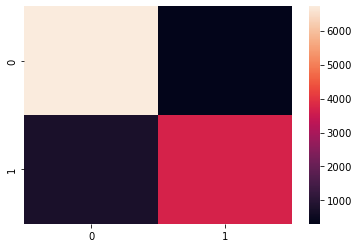

In [62]:
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))
plt.show()

In [63]:
# Get Weight of a word

clf.coef_[0][list(Count_Vectorizer.get_feature_names_out()).index("sad")]

-0.2648136602401646

In [64]:
clf.coef_[0][list(Count_Vectorizer.get_feature_names_out()).index("happy")]

ValueError: 'happy' is not in list

### Detect Emotion

In [38]:
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

def detect_emotion(clf, sentence):
    lm = WordNetLemmatizer()
    s =  str(TextBlob(sentence).correct())
    snt = ' '.join([lm.lemmatize(i) for i in s.split()])
    print(clf.predict(Count_Vectorizer.transform([snt])))

In [39]:
detect_emotion(clf, "this is veby interosting subjact. I feel very hapoy to read this")

['stressed']


### Get Weight of a word

In [40]:
def get_weight(model, word):
    try:
        print(model.coef_[0][list(Count_Vectorizer.get_feature_names_out()).index(word)])
    except IndexError:
        print(model.coef_.toarray()[0][list(Count_Vectorizer.get_feature_names_out()).index(word)])

In [41]:
get_weight(clf, "interesting")

ValueError: 'interesting' is not in list

In [42]:
get_weight(clf, "very")

ValueError: 'very' is not in list

In [43]:
get_weight(clf, "happy")

ValueError: 'happy' is not in list

In [44]:
get_weight(clf, "read")

0.10300285327638647


In [45]:
detect_emotion(clf,"I am happy today")

['stressed']


In [46]:
detect_emotion(clf, "hurrah! today i have cracked my interview. I feel very happy after that. ")

['stressed']


Some Prediction are not gives good result. Let's try l2 regularization. For that add some penalty

In [155]:
clf_l2 = LogisticRegression(penalty="l2", C=50, random_state=42, max_iter=1000)

np.average(cross_val_score(clf_l2, X, y, cv=10))

0.8834040123622794

In [156]:
clf_l2.fit(X_train, y_train)

LogisticRegression(C=50, max_iter=1000, random_state=42)

In [157]:
detect_emotion(clf=clf_l2, sentence="hurrah! today i have cracked my interview. i feel very happy after that.")

['stressed']


No!!! Let's try another algorithms

## 2. Support Vector Machine

### 1. Linear Kernal

Linear Kernel is used when the data is Linearly separable, that is, it can be separated using a single Line. It is mostly used when there are a Large number of Features in a particular Data Set. One of the examples where there are a lot of features, is Text Classification, as each alphabet is a new feature. So we mostly use Linear Kernel in Text Classification

In [120]:
from sklearn import svm

svc_linear = svm.SVC(kernel ='linear', C = 1)
svc_linear.fit(X_train, y_train)

y_pred = svc_linear.predict(X_test)

accuracy_score(y_pred, y_test)

0.9267265581134194

In [121]:
detect_emotion(svc_linear, "today i got very excited after geting this offer")

['un-stressed']


In [122]:
clf.coef_.shape

(1, 9317)

In [123]:
detect_emotion(svc_linear, "hurrah! today i have cracked my interview. i feel very happy after that.")

['un-stressed']


In [125]:
detect_emotion(svc_linear, "ohh no, we loose again. why it happen always with me")

['un-stressed']


In [87]:
get_weight(svc_linear, "today")

0.05613377108949286


In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3538
           1       0.94      0.94      0.94      5406

    accuracy                           0.93      8944
   macro avg       0.93      0.93      0.93      8944
weighted avg       0.93      0.93      0.93      8944



[[3239  299]
 [ 305 5101]]


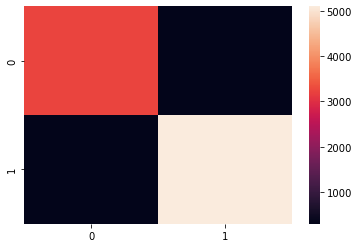

In [89]:
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))
plt.show()

### 2. Polynomial Kernal

In [ ]:
from sklearn import svm

svc_poly = svm.SVC(kernel ='poly', C = 1)
svc_poly.fit(X_train, y_train)

y_pred = svc_poly.predict(X_test)

accuracy_score(y_pred, y_test)

In [ ]:
detect_emotion(svc_linear, "today i got very excited after geting this offer")